In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(9876789)

In [88]:
#generar los datos
nsample = 100 #muestra de 100 datos
x = np.linspace(0, 10, 100)#arreglo de numpy de 0 a 10 con 100 puntos
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 1])#a=1,b=0,1,c=10
e = np.random.normal(0,1,size=nsample)#ruido blanco con varianza 2500

In [89]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

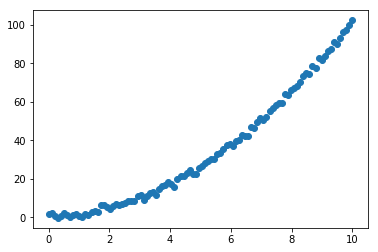

In [90]:
plt.scatter(x,y)

In [91]:
model = sm.OLS(y, X)#OLS=Ordinary Least Squares
results = model.fit()#Training, fitting o ajustar
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.833e+04
Date:                Sat, 19 Sep 2020   Prob (F-statistic):          2.68e-141
Time:                        11:56:40   Log-Likelihood:                -149.82
No. Observations:                 100   AIC:                             305.6
Df Residuals:                      97   BIC:                             313.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7339      0.323      2.270      0.0

In [92]:
y_true = np.dot(X, beta)

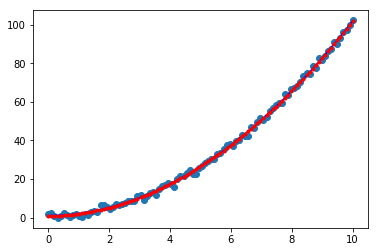

In [93]:
plt.plot(x, y, 'o', label="data")
plt.plot(x, y_true, 'b-', label="True")
plt.plot(x, results.fittedvalues, 'r--.', label="OLS")


In [99]:
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2

dummy = pd.get_dummies(groups).values
x = np.linspace(0, 20, nsample)
# drop reference category
X = np.column_stack((x, dummy[:,1:]))
X = sm.add_constant(X)

beta = [10,1., 3, -3]
y_true = np.dot(X, beta)
e = np.random.normal(0,2,size=nsample)
y = y_true + e

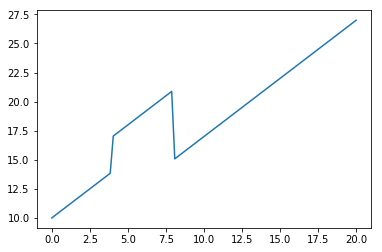

In [100]:
plt.plot(x,y_true)

In [101]:
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     157.1
Date:                Sat, 19 Sep 2020   Prob (F-statistic):           6.60e-37
Time:                        12:04:00   Log-Likelihood:                -208.71
No. Observations:                 100   AIC:                             425.4
Df Residuals:                      96   BIC:                             435.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1995      0.466     21.910      0.0

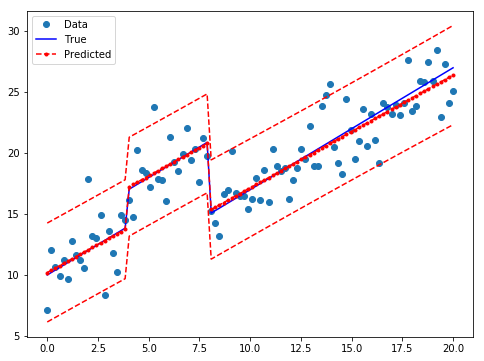

In [104]:
prstd, iv_lower, iv_upper = wls_prediction_std(res2)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res2.fittedvalues, 'r--.', label="Predicted")
ax.plot(x, iv_upper, 'r--')
ax.plot(x, iv_lower, 'r--')
legend = ax.legend(loc="best")

In [105]:
R = [[0, 1, 0, 0], [0, 0, 1, 0]]
print(np.array(R))
print(res2.f_test(R))

[[0 1 0 0]
 [0 0 1 0]]
<F test: F=array([[147.81224319]]), p=4.912097148256852e-30, df_denom=96, df_num=2>
